                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

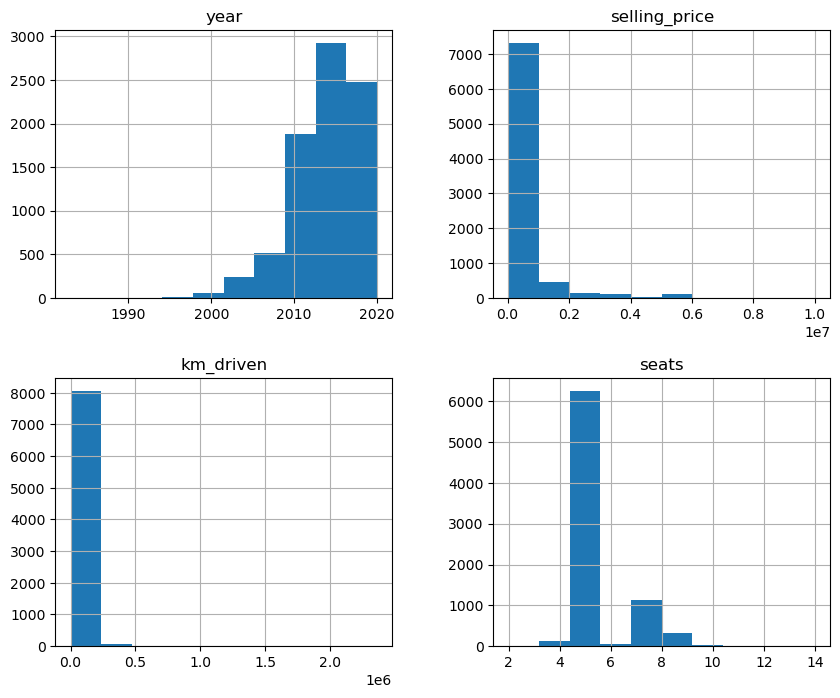

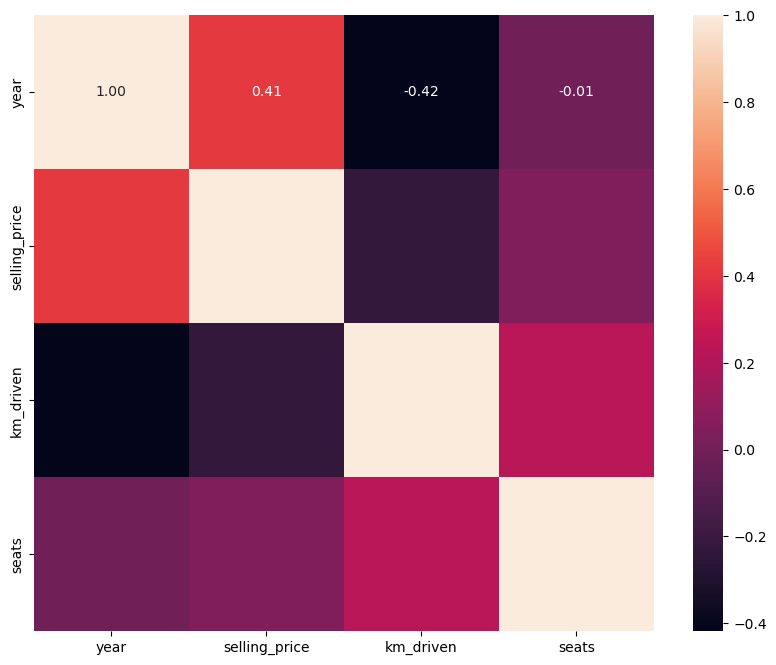

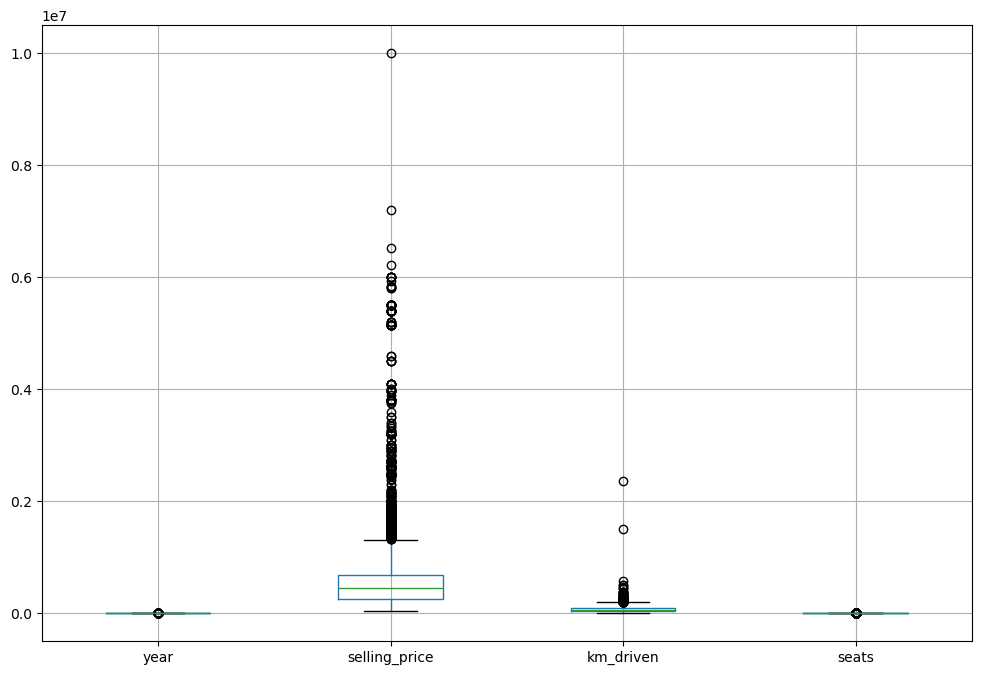

Index(['year', 'selling_price', 'km_driven', 'seats',
       'name_Ambassador CLASSIC 1500 DSL AC',
       'name_Ambassador Classic 2000 DSZ AC PS',
       'name_Ambassador Grand 1500 DSZ BSIII',
       'name_Ambassador Grand 2000 DSZ PW CL', 'name_Ashok Leyland Stile LE',
       'name_Audi A3 35 TDI Premium Plus',
       ...
       'torque_96.1Nm@ 3000rpm', 'torque_96Nm@ 2500rpm',
       'torque_96Nm@ 3000rpm', 'torque_96Nm@ 3500rpm',
       'torque_98Nm@ 1600-3000rpm', 'torque_99.04Nm@ 4500rpm',
       'torque_99.07Nm@ 4500rpm', 'torque_99.1Nm@ 4500rpm',
       'torque_99.8Nm@ 2700rpm', 'torque_99Nm@ 4500rpm'],
      dtype='object', length=3353)
R2 Score: 1.0
MSE: 2.9101195653942463e-17


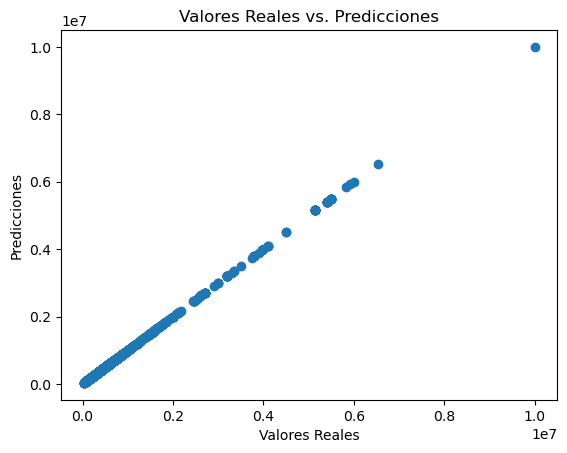

In [15]:
'''EJERCICIO 1 - DATA SET REGRESIÓN LINEAL'''
'''Paso 1 generación y configuración del dataset ANALISIS EXPLORATORIO DE DATOS '''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Carga de datos
df = pd.read_csv(r'C:\Users\camil\OneDrive\Escritorio\Universidad\Analisis de datos\Semana 3\Anexo 2 - Dataset Vehicle\Car details v3.csv')

# Imprimir las primeras filas para revisar la estructura de los datos
print(df.head())

# Resumen estadístico de columnas numéricas
print(df.describe())

# Información del DataFrame para ver los tipos de datos y la cantidad de valores no nulos
print(df.info())

# Histogramas para distribuciones de solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])  # Seleccionamos solo las columnas numéricas
df_numeric.hist(figsize=(10, 8))
plt.show()

'''BUSCAR RELACIONES ENTRE VARIABLES '''
# Matriz de correlación solo con columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f")
plt.show()

'''IDENTIFICACION DE VALORES ATIPICOS '''
# Boxplots para identificar outliers en las columnas numéricas
df_numeric.boxplot(figsize=(12, 8))
plt.show()

'''Paso 2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.'''

# Tratar valores faltantes solo en columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Por ejemplo, codificación de variables categóricas
df = pd.get_dummies(df)

'''Paso 3 Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.'''

# Seleccionar las K mejores características
selector = SelectKBest(f_regression, k='all')
X_new = selector.fit_transform(df, df['selling_price'])  # Usando todo el DataFrame
print(df.columns[selector.get_support()])

'''Paso 4 Dividir el dataset en Train y Test para evaluar correctamente el modelo.'''
X_train, X_test, y_train, y_test = train_test_split(X_new, df['selling_price'], test_size=0.3, random_state=42)


'''Paso 5 Entrenamiento de modelo con regresión lineal'''
model = LinearRegression()
model.fit(X_train, y_train)

''' Paso 6 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.'''

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

'''Paso 7 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.'''

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.1582

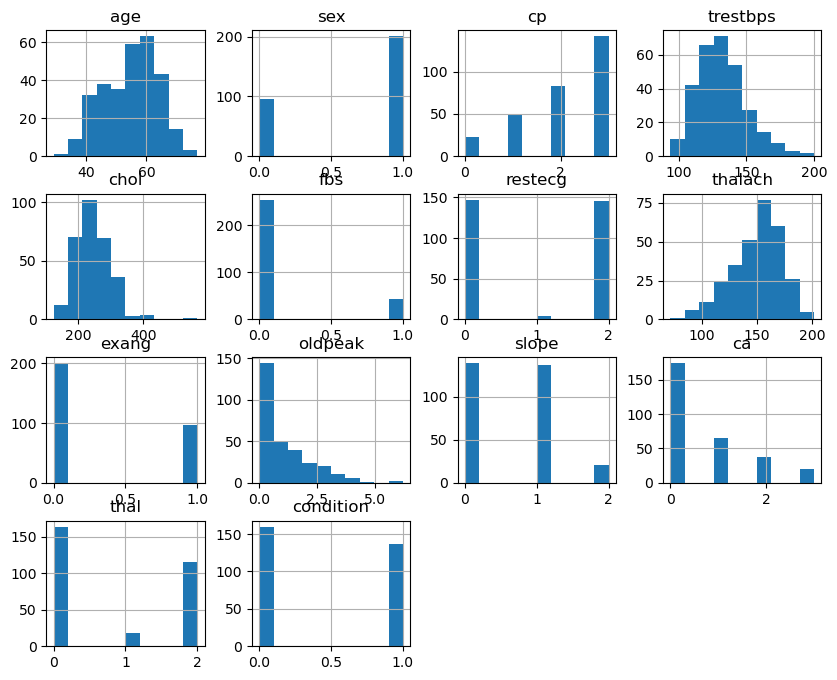

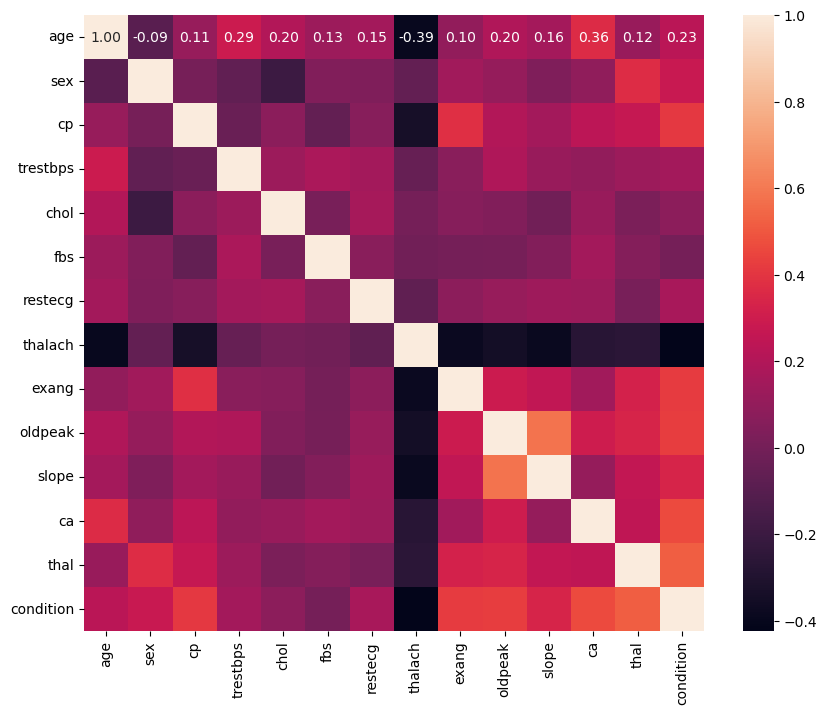

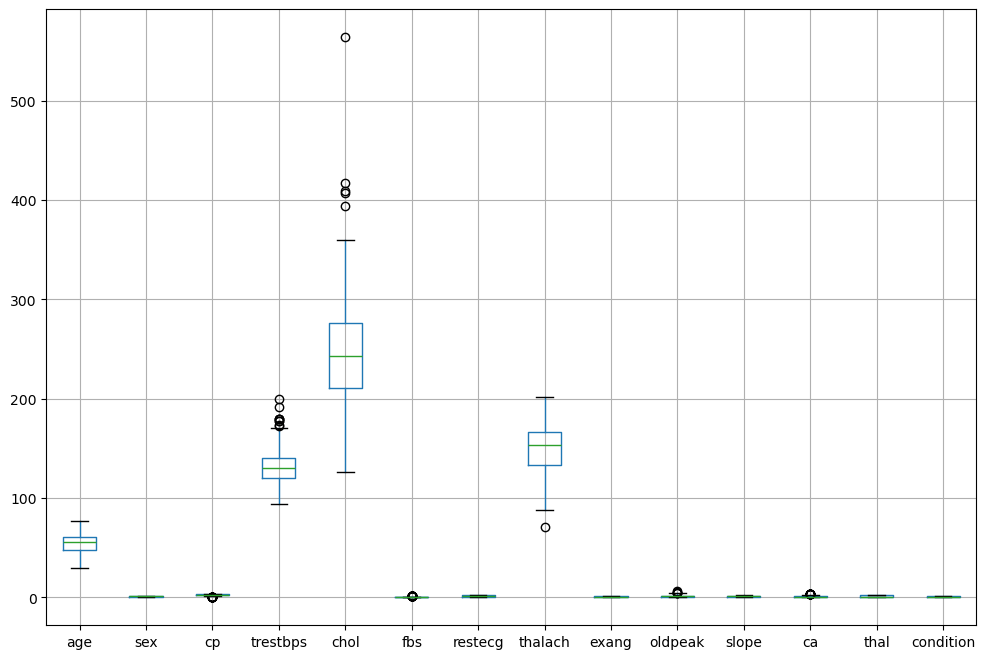

Index(['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')
Accuracy Score: 0.8222222222222222
Confusion Matrix:
[[39  9]
 [ 7 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.80      0.83      0.81        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



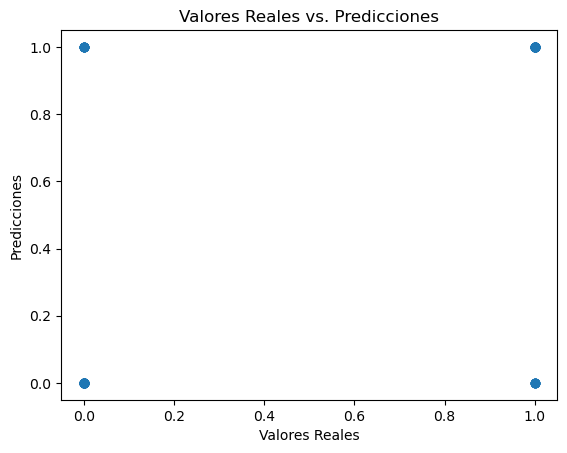

In [24]:
'''EJERCICIO 2 - DATA SET REGRESIÓN LOGISTICA'''

'''Paso 1: Generación y configuración del dataset - ANÁLISIS EXPLORATORIO DE DATOS '''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carga de datos
df = pd.read_csv(r'C:\Users\camil\OneDrive\Escritorio\Universidad\Analisis de datos\Semana 3\Anexo 3 - Dataset Heart Disease Cleveland UCI\heart_cleveland_upload.csv')

# Imprimir las primeras filas para revisar la estructura de los datos
print(df.columns)


print(df.head())

# Resumen estadístico de columnas numéricas
print(df.describe())

# Información del DataFrame para ver los tipos de datos y la cantidad de valores no nulos
print(df.info())

# Histogramas para distribuciones de solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.hist(figsize=(10, 8))
plt.show()

'''BUSCAR RELACIONES ENTRE VARIABLES'''
# Matriz de correlación solo con columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f")
plt.show()

'''IDENTIFICACION DE VALORES ATIPICOS'''
# Boxplots para identificar outliers en las columnas numéricas
df_numeric.boxplot(figsize=(12, 8))
plt.show()

'''Paso 2: Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.'''

# Tratar valores faltantes solo en columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

'''Paso 3: Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.'''

# Seleccionar las K mejores características
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(df.drop('condition', axis=1), df['condition'])  # Utilizamos 'condition' como variable objetivo
features = df.drop('condition', axis=1).columns[selector.get_support()]
print(features)

'''Paso 4: Dividir el dataset en Train y Test para evaluar correctamente el modelo.'''
X_train, X_test, y_train, y_test = train_test_split(X_new, df['condition'], test_size=0.3, random_state=42)

'''Paso 5: Entrenamiento de modelo con regresión logística'''
model = LogisticRegression(max_iter=1000)  # Aumentamos max_iter si es necesario
model.fit(X_train, y_train)

'''Paso 6: Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.'''

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

'''Paso 7: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.'''

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()



In [28]:
'''EJERCICIO NÚMERO 3 ARBOL DE DECISIONES'''
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

#Carga de dataset
data = pd.read_csv(r'C:\Users\camil\OneDrive\Escritorio\Universidad\Analisis de datos\Semana 3\Anexo 4 - Dataset Red Wine Quality\winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
data.shape


(1599, 12)

In [31]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

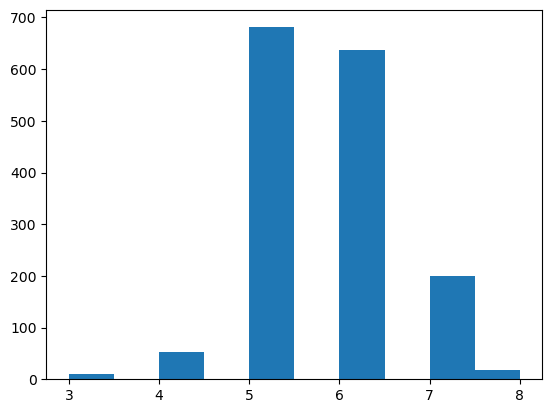

In [35]:
plt.hist(data.quality)

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

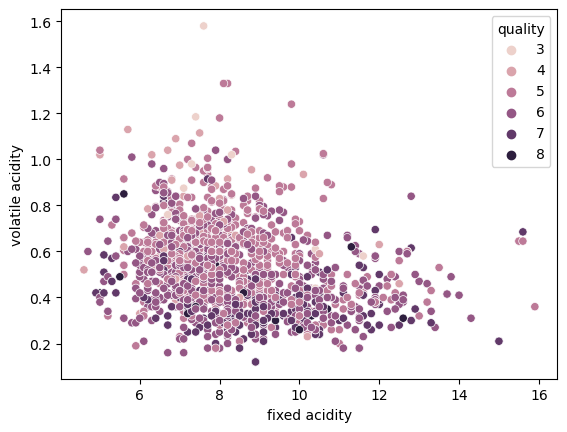

In [39]:
sns.scatterplot(x = "fixed acidity", y = "volatile acidity", hue = "quality", data = data)

In [44]:
predictors_col = ["fixed acidity", "volatile acidity", "pH", "sulphates"]
target_col = ['quality']

In [45]:
predictors = data[predictors_col]
target = data[target_col]

In [46]:
predictors

,fixed acidity,volatile acidity,pH,sulphates
0,7.4,0.700,3.51,0.56
1,7.8,0.880,3.20,0.68
2,7.8,0.760,3.26,0.65
3,11.2,0.280,3.16,0.58
4,7.4,0.700,3.51,0.56
...,...,...,...,...
1594,6.2,0.600,3.45,0.58
1595,5.9,0.550,3.52,0.76
1596,6.3,0.510,3.42,0.75
1597,5.9,0.645,3.57,0.71


In [47]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [48]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,pH,sulphates
fixed acidity,1.000000,-0.256131,-0.682978,0.183006
volatile acidity,-0.256131,1.000000,0.234937,-0.260987
pH,-0.682978,0.234937,1.000000,-0.196648
sulphates,0.183006,-0.260987,-0.196648,1.000000


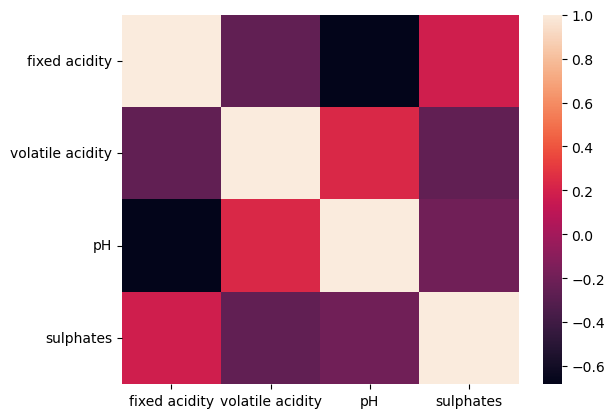

In [49]:
sns.heatmap(corr)
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [51]:
tree = DecisionTreeClassifier()

In [52]:
arbol = tree.fit(X_train, y_train)

[Text(0.3955501548394422, 0.98, 'x[3] <= 0.585\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.13662159124962542, 0.94, 'x[1] <= 0.365\ngini = 0.565\nsamples = 452\nvalue = [6, 30, 264, 134, 18, 0]'),
 Text(0.03221456397962241, 0.9, 'x[3] <= 0.505\ngini = 0.626\nsamples = 57\nvalue = [0, 3, 15, 30, 9, 0]'),
 Text(0.015582858855259216, 0.86, 'x[2] <= 3.125\ngini = 0.588\nsamples = 17\nvalue = [0, 1, 9, 6, 1, 0]'),
 Text(0.013185495954450104, 0.82, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0, 0]'),
 Text(0.017980221756068324, 0.82, 'x[1] <= 0.315\ngini = 0.531\nsamples = 14\nvalue = [0, 1, 9, 3, 1, 0]'),
 Text(0.00958945160323644, 0.78, 'x[2] <= 3.275\ngini = 0.72\nsamples = 5\nvalue = [0, 1, 1, 2, 1, 0]'),
 Text(0.00479472580161822, 0.74, 'x[3] <= 0.44\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 0, 1, 0]'),
 Text(0.00239736290080911, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.00719208870242733, 0.7, 'gini = 0.0\nsamples = 1\nva

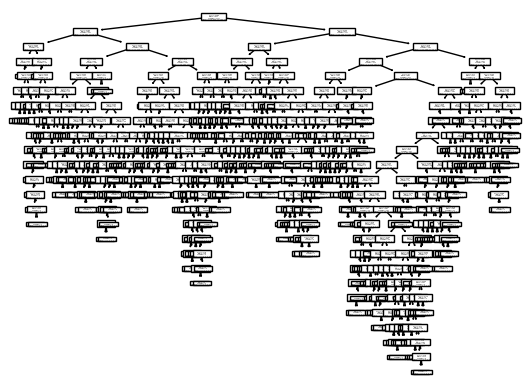

In [53]:
plot_tree(arbol)

In [54]:
predicciones = arbol.predict(X_test)

In [55]:
predicciones

array([6, 6, 5, 5, 6, 5, 5, 7, 5, 4, 4, 6, 5, 7, 7, 7, 6, 7, 6, 6, 5, 6,
       6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 6, 5, 5, 6, 6,
       5, 5, 6, 7, 6, 6, 5, 5, 6, 5, 7, 5, 5, 5, 7, 5, 6, 5, 5, 7, 8, 7,
       6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 7, 7, 6, 5, 5, 6, 6, 5,
       7, 7, 5, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 6, 5, 5, 7,
       5, 6, 7, 6, 6, 6, 7, 7, 4, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6,
       6, 7, 7, 5, 7, 5, 6, 6, 5, 5, 5, 7, 7, 5, 5, 5, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 7, 7, 5, 4, 5, 5, 5, 5, 5, 8, 4,
       5, 6, 7, 4, 6, 6, 6, 5, 6, 5, 6, 6, 7, 5, 5, 6, 5, 5, 7, 5, 6, 6,
       7, 5, 6, 6, 6, 6, 5, 4, 6, 6, 7, 6, 6, 5, 4, 6, 7, 5, 6, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 4, 6, 6, 6, 5, 5, 6, 6, 6, 4, 5, 5, 5, 6,
       6, 7, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 7, 6, 3, 7, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 5, 4, 6, 6, 5, 6, 4,
       8, 7, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 4, 5, 5,

In [56]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,1,0,0
4,0,2,5,2,2,0
5,1,12,116,45,7,0
6,0,5,45,83,15,3
7,0,0,4,18,23,4
8,0,0,0,2,4,0


In [57]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.56